In [11]:
# 1. Design model (input,output size, forward pass)
# 2. Construct loss and optimizer
# 3. Training loop
#    - forward pass: computer cost
#    - backward pass: compute gradients
#    - update weights
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [22]:
#Prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
#Reshape y to (m,1)
y = y.view(y.shape[0],1)
n_samples, n_features = X.shape

In [23]:
#Model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

In [24]:
#loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

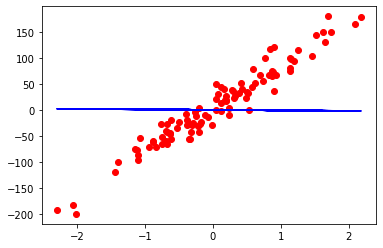

In [25]:
#plot
predicted = model(X).detach().numpy() #detach sets the models require_gradients to false
plt.plot(X_numpy,y_numpy,'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

In [26]:
#Training
num_epochs = 100
for epoch in range(num_epochs):
    #forward and loss
    y_pred = model(X)
    loss = criterion(y,y_pred)
    #backward
    loss.backward()
    #weight update
    optimizer.step()
    #Empty gradients
    optimizer.zero_grad()
    if epoch % 10 == 0:
        [w,b] = model.parameters()
        print(f'epoch {epoch + 1}:\t w={loss.item():.3f}')

epoch 1:	 w=5858.976
epoch 11:	 w=4338.718
epoch 21:	 w=3239.364
epoch 31:	 w=2443.496
epoch 41:	 w=1866.744
epoch 51:	 w=1448.384
epoch 61:	 w=1144.649
epoch 71:	 w=923.955
epoch 81:	 w=763.480
epoch 91:	 w=646.712


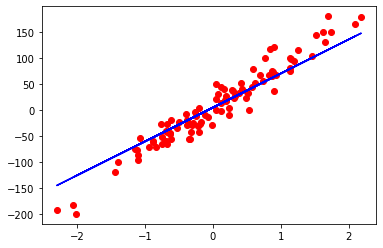

In [27]:
#plot
predicted = model(X).detach().numpy() #detach sets the models require_gradients to false
plt.plot(X_numpy,y_numpy,'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()